# Practicel ML - KNN

### Full Name : shayan aryania
### Student Number : 402211767

In this Notebook, we will implement KNN for the given dataset. This notebook has 3 phases, in the first phase we explore dataset, in the second phase we preprocess the dataset and in the last phase we implement KNN from scratch and also with sklearn and train it on the dataset.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

Inspect the first rows of the dataframe

In [2]:
# TODO
df = pd.read_csv('./train.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,29,No,Travel_Rarely,592,Research & Development,7,3,Life Sciences,1,1883,...,2,80,0,11,2,3,3,2,1,2
1,36,No,Travel_Rarely,884,Sales,1,4,Life Sciences,1,1585,...,1,80,0,15,5,3,1,0,0,0
2,34,No,Travel_Rarely,1326,Sales,3,3,Other,1,1478,...,4,80,0,15,2,3,13,9,3,12
3,27,No,Travel_Rarely,954,Sales,9,3,Marketing,1,1965,...,1,80,0,7,5,3,7,7,0,7
4,32,No,Travel_Rarely,929,Sales,10,3,Marketing,1,722,...,4,80,0,10,2,2,10,7,0,8


Calculate the number of samples

In [3]:
# TODO
number_of_samples = df.shape[0]
number_of_samples

1102

Measure the number of unique values for each column. Note that Attrition is the target column.

In [24]:
# TODO
unique_values = df.nunique()
print(unique_values)

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    736
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeNumber              1102
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1027
MonthlyRate                 1082
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                34
YearsInCurrentRole            19
YearsSince

In [25]:
print("unique_values in 'Attrition':", df['Attrition'].nunique())

unique_values in 'Attrition': 2


Check if there is a column with less than two unique values. If such a columns exists, remove it!

In [26]:
# TODO
drop_columns = unique_values[unique_values < 2].index.tolist()
drop_columns

[]

In [6]:
if drop_columns:
    df.drop(columns=drop_columns, inplace=True)
    print("The above columns removed.")
else:
    print("No columns with less than two unique values found.")

The above columns removed.


In [7]:
print(df.head())

   Age Attrition BusinessTravel  DailyRate              Department  \
0   29        No  Travel_Rarely        592  Research & Development   
1   36        No  Travel_Rarely        884                   Sales   
2   34        No  Travel_Rarely       1326                   Sales   
3   27        No  Travel_Rarely        954                   Sales   
4   32        No  Travel_Rarely        929                   Sales   

   DistanceFromHome  Education EducationField  EmployeeNumber  \
0                 7          3  Life Sciences            1883   
1                 1          4  Life Sciences            1585   
2                 3          3          Other            1478   
3                 9          3      Marketing            1965   
4                10          3      Marketing             722   

   EnvironmentSatisfaction  ... PerformanceRating  RelationshipSatisfaction  \
0                        4  ...                 3                         2   
1                        2  ..

Plot Mean BusinessTravel against Age. Note: Since the BusinessTravel column is categorical, you should first consider another column corresponding to each unique value BusinessTravel takes. For instance, you may assume that if someone does not travel, the value of the column for this person is 0.

In [8]:
# handle uniqueness
# TODO
unique_business_travel = df['BusinessTravel'].unique()
unique_business_travel

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [9]:
travel_mapping = {
    "Non-Travel": 0,
    "Travel_Rarely": 1,
    "Travel_Frequently": 2
}
print("Prepared mapping':", travel_mapping)

Prepared mapping': {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}


In [10]:
# Map the column

# TODO
df['BusinessTravelNumeric'] = df['BusinessTravel'].map(travel_mapping)
print(df[['BusinessTravel', 'BusinessTravelNumeric']].head())

  BusinessTravel  BusinessTravelNumeric
0  Travel_Rarely                      1
1  Travel_Rarely                      1
2  Travel_Rarely                      1
3  Travel_Rarely                      1
4  Travel_Rarely                      1


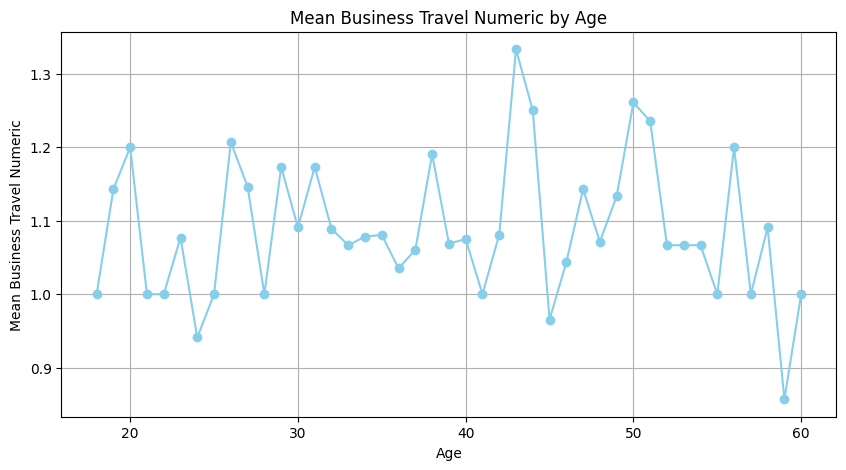

In [11]:
# plot

# TODO
mean_travel_by_age = df.groupby('Age')['BusinessTravelNumeric'].mean()
plt.figure(figsize=(10, 5))
mean_travel_by_age.plot(kind='line', marker='o', color='skyblue')
plt.title('Mean Business Travel Numeric by Age')
plt.xlabel('Age')
plt.ylabel('Mean Business Travel Numeric')
plt.grid(True)
plt.show()

Check if there seems to be a meaningful relationship between people's age and the years they have worked with their current manager. Your result should be a plot.

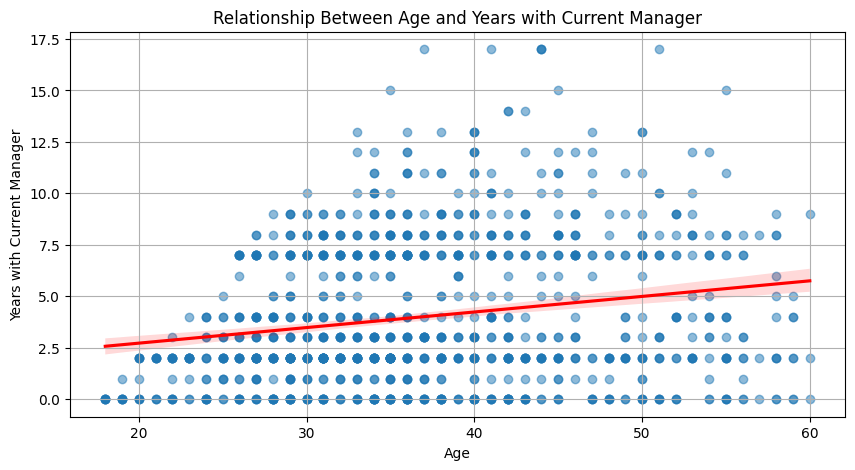

In [12]:
# TODO
plt.figure(figsize=(10, 5))
sns.regplot(x='Age', y='YearsWithCurrManager', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Relationship Between Age and Years with Current Manager')
plt.xlabel('Age')
plt.ylabel('Years with Current Manager')
plt.grid(True)
plt.show()

In [13]:
# TODO
correlation = df['Age'].corr(df['YearsWithCurrManager'])
print("Pearson correlation coefficient:", correlation)

Pearson correlation coefficient: 0.19872949548244342


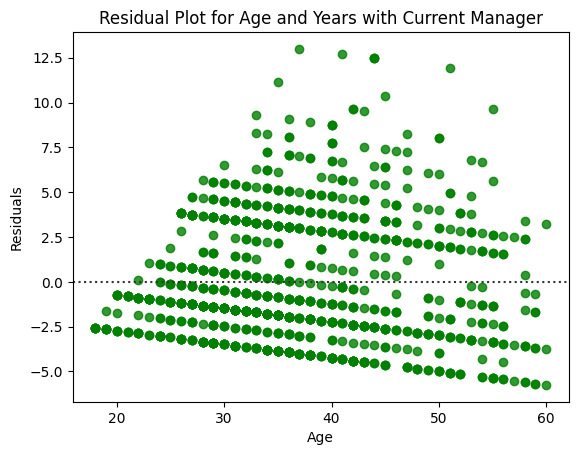

In [14]:
sns.residplot(x='Age', y='YearsWithCurrManager', data=df, color='green')
plt.title('Residual Plot for Age and Years with Current Manager')
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.show()

Plot the average MonthlyIncome against the YearsAtCompany. 

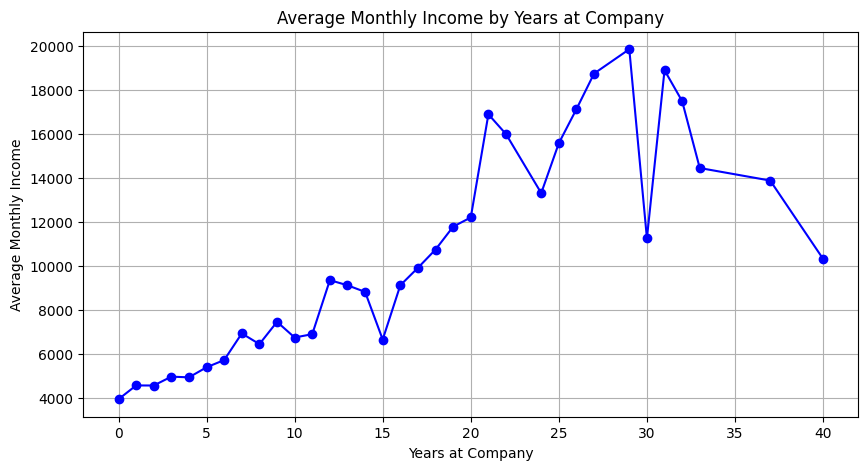

In [15]:
average_income_by_years = df.groupby('YearsAtCompany')['MonthlyIncome'].mean()
plt.figure(figsize=(10, 5))
average_income_by_years.plot(kind='line', marker='o', color='blue')  # Line plot
plt.title('Average Monthly Income by Years at Company')
plt.xlabel('Years at Company')
plt.ylabel('Average Monthly Income')
plt.grid(True)
plt.show()

## Preprocessing

Label encode all categorical columns and split the data into train and test parts. The training part will further splitted into train and validation parts.

In [31]:
dtypes = df.dtypes
categorical_columns = dtypes[dtypes == 'object'].index
numerical_columns = dtypes[(dtypes == 'int') | (dtypes == 'float')].index
label_encoders = {column: LabelEncoder() for column in categorical_columns}
df[categorical_columns] = df[categorical_columns].apply(lambda x: label_encoders[x.name].fit_transform(x))
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravelNumeric
0,-0.852159,-0.454983,0.588606,-0.508455,-0.502636,-0.285906,0.094018,-0.942276,1.419614,1.190392,...,-0.645578,-0.949842,-0.014296,-0.615111,0.365845,-0.642460,-0.603137,-0.360548,-0.569369,-0.183479
1,-0.093088,-0.454983,0.588606,0.209318,1.400816,-1.017204,1.053349,-0.942276,0.928104,-0.641748,...,-1.574333,-0.949842,0.498037,1.695749,0.365845,-0.970918,-1.155867,-0.682269,-1.138997,-0.183479
2,-0.309965,-0.454983,0.588606,1.295810,1.400816,-0.773438,0.094018,1.328252,0.751623,1.190392,...,1.211933,-0.949842,0.498037,-0.615111,0.365845,0.999830,1.331416,0.282892,2.278769,-0.183479
3,-1.069036,-0.454983,0.588606,0.381387,1.400816,-0.042139,0.094018,-0.185433,1.554862,1.190392,...,-1.574333,-0.949842,-0.526629,1.695749,0.365845,0.014456,0.778687,-0.682269,0.854700,-0.183479
4,-0.526843,-0.454983,0.588606,0.319933,1.400816,0.079744,0.094018,-0.185433,-0.495295,1.190392,...,1.211933,-0.949842,-0.142379,-0.615111,-1.068894,0.507143,0.778687,-0.682269,1.139514,-0.183479


In [28]:
# split into train and validation

# TODO
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2

Split the test and validation dataframe into feature and label part, Attrition columns is the target columns and rest of the columns should be treated as features. (Note that win_or_defeat column is the target column)

In [34]:
# TODO
X_val = val_data.drop('Attrition', axis=1) 
y_val = val_data['Attrition']

X_test = test_data.drop('Attrition', axis=1) 
y_test = test_data['Attrition'] 

X_train = train_data.drop('Attrition', axis=1)
y_train = train_data['Attrition']

print("Validation and Test datasets have been split into features and labels.")
print("Validation features shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)
print("Test features shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Validation and Test datasets have been split into features and labels.
Validation features shape: (221, 32)
Validation labels shape: (221,)
Test features shape: (221, 32)
Test labels shape: (221,)



# Model Implementation From Scratch
  



## How the algorithm works

**We calculate the euclidean distance between a new sample and all points**

**We determine the label of the sample based on the majority vote**

## Key Points:

### Euclidean Distance
**Euclidean distance is defined as the distance between two points**

**Where it's represented by this equation :
$$\sqrt{\sum\limits_{i = 0}^{m-1} (x - y)^2}$$**


In [35]:
import numpy as np
from collections import Counter

class KNN:
    def __init__(self, k=3):
        """
        Initialize the KNN classifier with the specified number of neighbors.

        Parameters:
        - k (int): Number of neighbors to consider.
        """
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X_train, y_train):
        """
        Fit the KNN classifier to the training data by storing it.
        This method doesn't compute anything in the fitting phase because KNN is a lazy learner.

        Parameters:
        - X_train (numpy array): Training feature vectors.
        - y_train (numpy array): Training labels.
        """
        self.X_train = X_train
        self.y_train = y_train

    def euclidean_distance(self, x1, x2):
        """
        Calculate the Euclidean distance between two data points.

        Parameters:
        - x1 (numpy array): First data point.
        - x2 (numpy array): Second data point.

        Returns:
        - float: Distance between x1 and x2.
        """
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X_test):
        """
        Predict labels for test data based on the stored training data.

        Parameters:
        - X_test (numpy array): Test feature vectors.

        Returns:
        - numpy array: Predicted labels for the test data.
        """
        predicted_labels = [self._predict(x) for x in X_test]
        return np.array(predicted_labels)

    def _predict(self, x):
        """
        Predict the label for a single test data point using the k-nearest neighbors' voting.

        Parameters:
        - x (numpy array): Test data point.

        Returns:
        - int: Predicted label.
        """
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]



# Evaluation
  

Define the model and train it.

In [37]:
# TODO
X_train_list = [X_train.iloc[i].to_numpy() for i in range(len(X_train))]
y_train_list = y_train.values.tolist()
X_test_list = [X_test.iloc[i].to_numpy() for i in range(len(X_test))]
knnclassifier = KNN(3)
knnclassifier.fit(X_train_list, y_train_list)

Predict the y_train and y_test values.

In [39]:
y_train_pred = knnclassifier.predict(X_train_list)
y_test_pred = knnclassifier.predict(X_test_list)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train_Accuracy: {train_accuracy}")
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test_Accuracy: {test_accuracy}")

Train_Accuracy: 0.8727272727272727
Test_Accuracy: 0.755656108597285


# Sklearn Implementation
  

Define the sklearn knn model and fit to the training data

In [40]:
knn_sklearn = KNeighborsClassifier(n_neighbors=3)
knn_sklearn.fit(X_train_list, y_train_list)

KNeighborsClassifier(n_neighbors=3)

Now predict the defined model on test data and return the accuracy

In [41]:
# TODO

test_accuracy_sklearn = knn_sklearn.score(X_test_list, y_test)
print(f"Test Accuracy: {test_accuracy_sklearn:.2f}")

Test Accuracy: 0.76


# Thank You


**Thank you for taking your time going through this notebook**

**If you have any feedback please let me know**